## Computer Vision

# Project 03

### Testing

#### Import libraries

In [2]:
import cv2
import keras
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### Read dataset

In [3]:
def read_csv(dataset_type,i):
    n = ""
    if i < 10:
        n = "0" + str(i)
    else:
        n = str(i)
    to_home = '../../../../'
    dataset_path = 'Multimedia/Datasets/Human Actions/Dataset/'
    file_path = 'Video_' + n + '/Video_' + n + '_' + dataset_type + '.csv'
    dataset_info_file = to_home + dataset_path + file_path
    df = pd.read_csv(dataset_info_file)
    return df
    
def create_datasets(dataset_type,test_video):
    df = pd.DataFrame()
    df = df.append(read_csv(dataset_type,test_video))
    return df

In [4]:
dataset_type = 'gray'
test_video = 6
df_test = create_datasets(dataset_type,test_video)

#### Load images

In [5]:
def func(df):
    path_to_folder = '../../../../Multimedia/Datasets/Human Actions/'
    X = []
    for i, filename in enumerate(df['Image path']):
        image = cv.imread(path_to_folder+filename)
        X.append(image)
    X = np.array(X)
    X = X.astype('float32')
    X = X/255
    
    total_samples,rows,columns,channels = X.shape
    print('total samples:',total_samples)
    
    timestep = 10
    samples = round(total_samples/timestep)

    X_ = np.zeros((samples,timestep,rows,columns,channels))
    
    print('samples:      ',samples)
    print('timestep:     ',timestep)
    print('rows:         ',rows)
    print('columns:      ',columns)
    print('channels:     ',channels)
    print('')

    violence_threshold = 1
    k = 0
    for i in range(samples):
        l = 0
        for j in range(timestep):
            if k < total_samples:
                X_[i,j,:,:,:] = X[k,:,:,:]
                k += 1
    return X_

In [6]:
print('Test set')
X_test = func(df_test)

Test set
total samples: 1434
samples:       143
timestep:      10
rows:          108
columns:       192
channels:      3



#### Load model

In [8]:
model = keras.models.load_model("CNN_LSTM.h5")
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
dataset_type_GoDec = 'godec'
test_video_GoDec = 6
df_test_GoDec = create_datasets(dataset_type_GoDec,test_video_GoDec)

In [10]:
print('Test set')
X_test_GoDec = func(df_test_GoDec)

Test set
total samples: 1434
samples:       143
timestep:      10
rows:          108
columns:       192
channels:      3



In [11]:
model = keras.models.load_model("CNN_LSTM_GoDec.h5")
pred_GoDec = model.predict(X_test_GoDec)
pred_GoDec = np.argmax(pred_GoDec,axis = 1)
print(pred_GoDec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]


#### Show results

Create a video of the results.

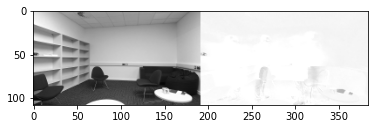

In [12]:
samples,timestep,rows,columns,channels = X_test.shape
fig = plt.figure()
MP4 = []
for i in range(samples):
    for j in range(timestep):
        image = X_test[i,j,:,:,:]
        image = (image*255).astype(np.uint8)
        image_GoDec = X_test_GoDec[i,j,:,:,:]
        image_GoDec = (image_GoDec*255).astype(np.uint8)
        if pred[i] == 1:
            image = cv2.putText(image,'Violence',(100,20),cv2.FONT_HERSHEY_SIMPLEX,0.3,(255,0,0),0,cv2.LINE_AA)
        if pred_GoDec[i] == 1:
            image_GoDec = cv2.putText(image_GoDec,'Violence',(100,20),cv2.FONT_HERSHEY_SIMPLEX,0.3,(255,0,0),0,cv2.LINE_AA)
        n_img = cv.hconcat([image,image_GoDec])
        v = plt.imshow(n_img,cmap='gray',animated=True)
        MP4.append([v])
ani = animation.ArtistAnimation(fig,MP4,interval=50,blit=True,repeat_delay=1000)
ani.save('Results.mp4')
plt.show()

Display the results.

In [13]:
from IPython.display import Video
Video("Results.mp4")